#### Preparación para correr el código

In [1]:
import cv2;
import numpy as np;
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
from IPython.display import display

import sys

print("Python version %s / OpenCV version %s " %(sys.version,cv2.__version__))

Python version 3.11.8 (main, Feb 12 2024, 14:50:05) [GCC 13.2.1 20230801] / OpenCV version 4.9.0 


In [2]:
drive_path = ".."

#### Ejercicio 4
2. texto

interactive(children=(IntSlider(value=150, description='low_r', max=255), IntSlider(value=150, description='lo…

<function __main__.track_rgb_azul(low_r, low_g, low_b, high_r, high_g, high_b)>

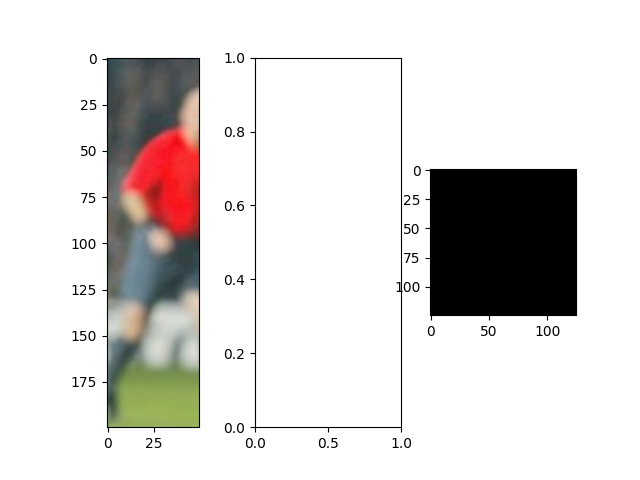

In [246]:
%matplotlib widget
futbol_path = "../images/futbol.jpg"
futbol = cv2.imread(futbol_path)
futbol = cv2.cvtColor(futbol,cv2.COLOR_BGR2RGB)
futbol_mod = futbol.copy()


roi_rojo = futbol[50:250,0:50].copy()
roi_verde = futbol[60:300,100:250].copy()
roi_azul = futbol[75:200,275:400].copy()

# for y in range(futbol.shape[0]):
#     for x in range(futbol.shape[1]):
#         color = futbol[y,x,0]**2+futbol[y,x,1]**2+futbol[y,x,2]**2
#         # if (color < 20 and color > 0):
#         if (color < 195075) and color > 180000:
#             futbol_mod[y,x,:] = [0,0,0]

def segment_rgb(img,low_r,low_g,low_b,high_r,high_g,high_b):
    lower_bound = np.array([low_r,low_g,low_b])  
    upper_bound = np.array([high_r,high_g,high_b]) 

    mask = cv2.inRange(img, lower_bound, upper_bound)
    segmented_image = cv2.bitwise_and(img, img, mask=mask)
    return segmented_image

fig, ax = plt.subplots(1,3)
segmented_image = roi_rojo
ax[0].imshow(segmented_image)
def track_rgb_rojo(low_r,low_g,low_b,high_r,high_g,high_b):
    global c,segmented_image
    segmented_image = segment_rgb(roi_rojo,low_r,low_g,low_b,high_r,high_g,high_b)
    ax[0].cla()
    ax[0].imshow(segmented_image)

def track_rgb_verde(low_r,low_g,low_b,high_r,high_g,high_b):
    global c,segmented_image
    segmented_image = segment_rgb(roi_verde,low_r,low_g,low_b,high_r,high_g,high_b)
    ax[1].cla()
    ax[1].imshow(segmented_image)

def track_rgb_azul(low_r,low_g,low_b,high_r,high_g,high_b):
    global c,segmented_image
    segmented_image = segment_rgb(roi_azul,low_r,low_g,low_b,high_r,high_g,high_b)
    ax[2].cla()
    ax[2].imshow(segmented_image)

widgets.interact(
    track_rgb_azul,
    low_r=widgets.IntSlider(min=0,max=255,value=150),
    low_g=widgets.IntSlider(min=0,max=255,value=150),
    low_b=widgets.IntSlider(min=0,max=255,value=150),
    high_r=widgets.IntSlider(min=0,max=255,value=150),
    high_g=widgets.IntSlider(min=0,max=255,value=150),
    high_b=widgets.IntSlider(min=0,max=255,value=150)
)

# ax[0].imshow(roi_rojo)
# ax[0].imshow(segmented_image)
# ax[1].imshow(roi_verde)
# ax[2].imshow(roi_azul)



# # plt.figure()
# # plt.imshow(futbol)
# # plt.show()

#### Ejercicio 5
2. texto

In [4]:
def plot_perfil(imagen,i):
    fig,ax= plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.plot(imagen[i,:,2])
    plt.plot()

def comparar_hsv_hls(imagen_hsv,imagen_hls,i):
    fig,ax= plt.subplots(1,2)
    fig.set_size_inches(18.5, 10.5)
    ax[0].plot(imagen_hsv[i,:,2])
    ax[1].plot(imagen_hls[i,:,1])
    plt.plot()

In [6]:
def detectar_zona(imagen):
    lookUpTable = np.zeros((1,256), np.uint8)
    for i in range(200,256):
        lookUpTable[0,i] = i
    
    imagen_mask = cv2.LUT(imagen,lookUpTable)
    print(imagen_mask.shape)
    plt.figure()
    plt.imshow(imagen_mask[273:706,151:730])
    plt.show()


cantidad de hectareas sanas: 82.694800 ha
cantidad de hectareas deforestadas: 16.435200 ha


[]

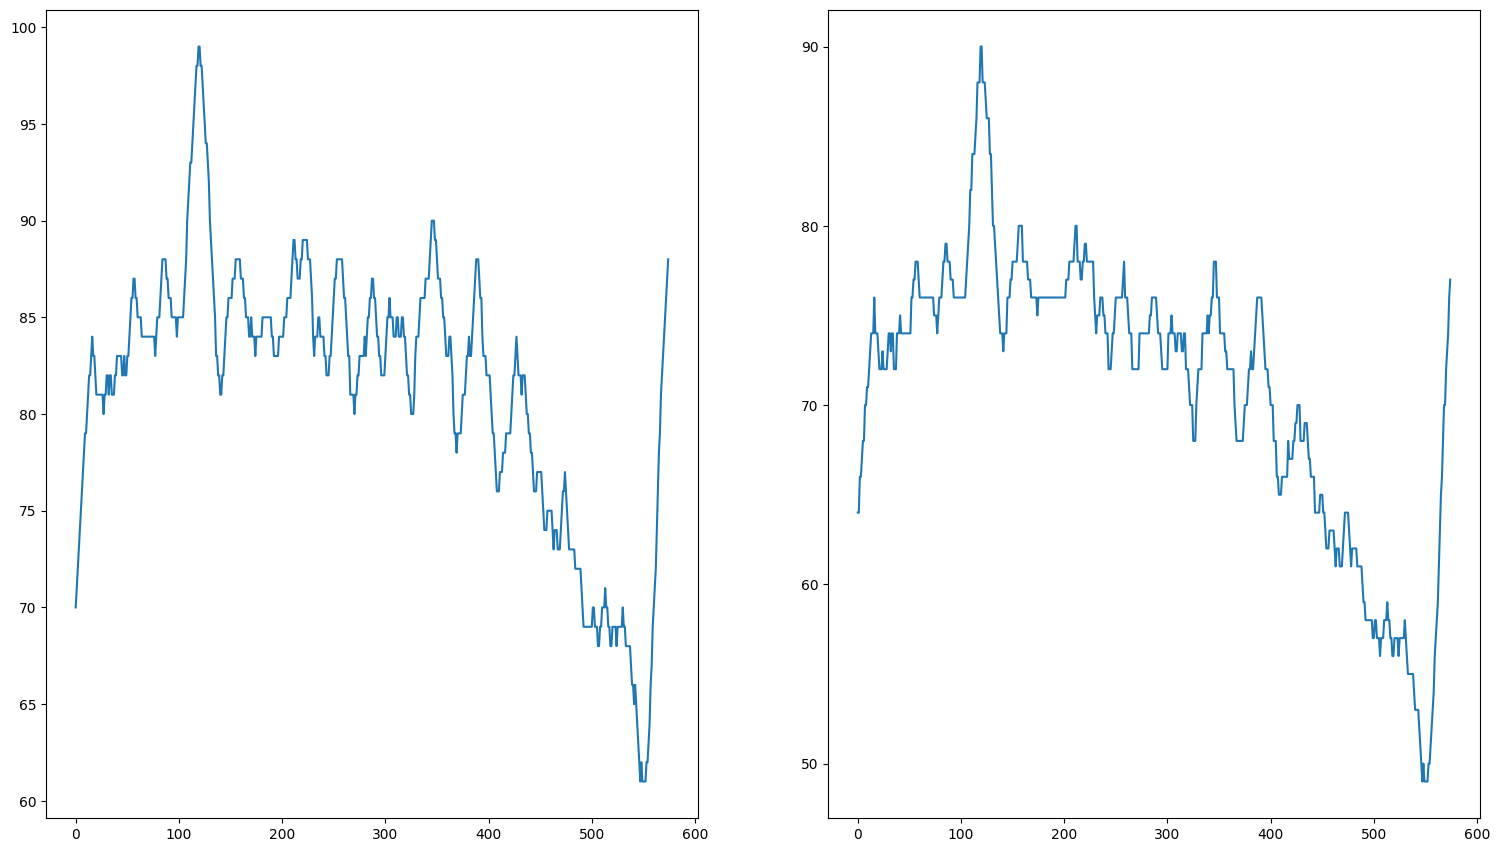

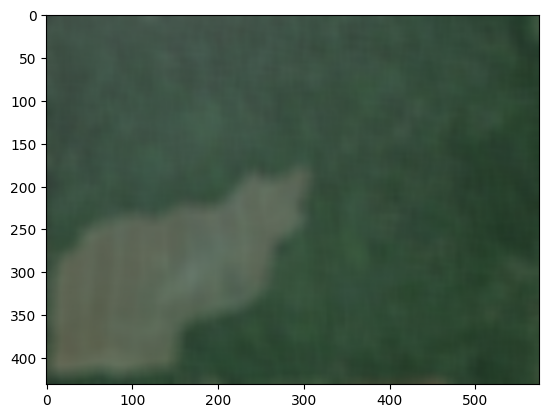

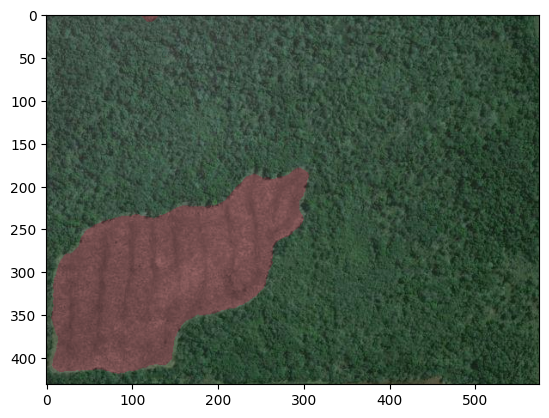

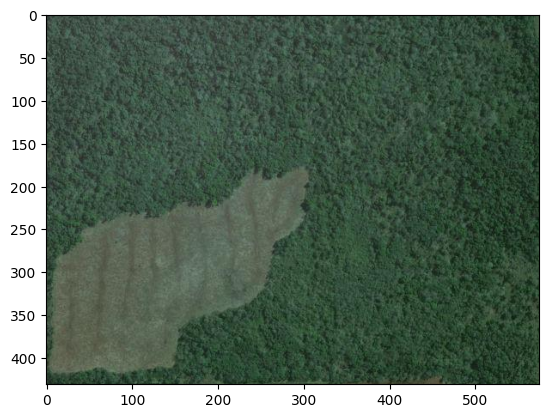

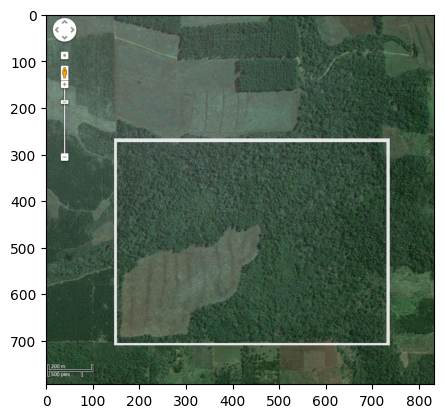

In [8]:
deforestacion_path = "../images/Deforestacion.png"
rango= [[275,706],[155,730]]

deforestacion = cv2.imread(deforestacion_path)
deforestacion = cv2.cvtColor(deforestacion,cv2.COLOR_BGR2RGB)
def_roi = deforestacion[rango[0][0]:rango[0][1],rango[1][0]:rango[1][1]]
deforestacion_hsv = cv2.cvtColor(def_roi,cv2.COLOR_RGB2HSV)
deforestacion_hls = cv2.cvtColor(def_roi,cv2.COLOR_RGB2HLS)

kernel_size=20
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)
kernel /= (kernel_size**2)

deforestacion_blur = cv2.filter2D(def_roi,-1,kernel,borderType=cv2.BORDER_REPLICATE)
deforestacion_blur_hsv = cv2.cvtColor(deforestacion_blur,cv2.COLOR_RGB2HSV)
deforestacion_blur_hls = cv2.cvtColor(deforestacion_blur,cv2.COLOR_RGB2HLS)

# detectar_zona(deforestacion)


# plot_perfil(deforestacion,500)
# plot_perfil(deforestacion,500)
# plot_perfil(deforestacion_blur,500)

# comparar_hsv_hls(deforestacion_hsv,deforestacion_hls,350)
comparar_hsv_hls(deforestacion_blur_hsv,deforestacion_blur_hls,2)

pixeles_deforestados = 0
deforestacion_blur_rojo = deforestacion_hls.copy()
for y in range(deforestacion_blur_hls.shape[0]):
    for x in range(deforestacion_blur_hls.shape[1]):
        if deforestacion_blur_hls[y,x,1] > 83:
            pixeles_deforestados +=1
            deforestacion_blur_rojo[y,x,0] = 0
            # deforestacion_blur_rojo[y,x,1] = 100
            deforestacion_blur_rojo[y,x,2] = 50

# print("cantidad de metros cuadrados deforestados: %d"%(pixeles_deforestados*4))


pix_sanos = deforestacion_blur_rojo.shape[0]*deforestacion_blur_rojo.shape[1] - pixeles_deforestados
hectareas_sanas = pix_sanos * 4 * 0.0001
hectareas_deforestadas = pixeles_deforestados * 4 * 0.0001
print("cantidad de hectareas sanas: %f ha"%(hectareas_sanas))
print("cantidad de hectareas deforestadas: %f ha"%(hectareas_deforestadas))

# print(deforestacion_blur_rojo[0,0,:])
deforestacion_blur_rojo = cv2.cvtColor(deforestacion_blur_rojo,cv2.COLOR_HLS2RGB)

plt.figure()
plt.imshow(deforestacion_blur)
plt.figure()
plt.imshow(deforestacion_blur_rojo)
plt.figure()
plt.imshow(def_roi)
# plt.imshow(deforestacion[rango[0][0]:rango[0][1],rango[1][0]:rango[1][1]])

plt.figure()
plt.imshow(deforestacion)
plt.plot()